## Model Preparation Challenge!
The goal of this challenge is to explore the dataset as provided by Thinkful and find what factors affect life expectancy.  The techniques applied should be what I have been learning throughout this module, including finding outliers, filling in missing data, EDA, and feature engineering.

The data was downloaded from Thinkful's database, but the original data was taken from Kaggle's [Life Expectancy dataset](https://www.kaggle.com/kumarajarshi/life-expectancy-who/home).  The dataset is taken from World Health Organization (WHO) data repository and features 193 countries from 2000 to 2015.  A list of features and brief description are described below:  

| Features | Description   |
|------|------|
|   Country  | |
|   Year  | |
|   Status  | Developed/Developing |
|   Life Expectancy  | Expressed by age |
|   Adult Mortality  | Probability of dying between 15 and 60 years per 1000 population |
|   Infant Deaths  | Number of infant deaths per 1000 population |
|   Alcohol  | Liters of pure alcohol consumed per capita |
|   Percentage Expenditure  | Expenditure on health as a percentage of GDP/capita |
|   Hepatitis B  | Hepatitis B immunization coverage for 1 year olds |
|   Measles  | Number of cases per 1000 population |
|   BMI  | Body Mass Index |
|   under-five deaths  | Number of deaths under age of five per 1000 population|
|   Polio  | Polio immunization coverage for 1 year olds |
|   Total expenditure  | General government expenditure/total government expenditure |
|   Diphtheria  | DTP3 immunization coverage for 1 year olds |
|   HIV/AIDS  | Deaths per 1000 live births for HIV/AIDS (0-4 years) |
|   GDP  | Gross domestic product per capita (US Dollar) |
|   Population  | |
|   thinness 1-19 years  | Prevalence of thinness for ages 10-19 |
|   thinness 5-8 years  | Prevalence of thinness for ages 5-8 |
|   Income composition of resources  | Human Development Index in terms of income composition of resources |
|   Schooling  | Number of years in school|

### 1 - Loading and Reading the Dataset
Using the info function, we see there are a total of 2938 rows and the majority of the features have missing values.  In addition, all features are greater than or equal to 0.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tabulate import tabulate
from scipy.stats.mstats import winsorize

In [2]:
df = pd.read_csv('lifeexpectancy.csv')

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [5]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
df.describe(include = ['O'])

,Country,Status
count,2938,2938
unique,193,2
top,Lebanon,Developing
freq,16,2426


### 2 - Missing Values
A table of missing values for each feature is printed below.  The majority of features have missing values, with the lowest amount being less than 1%, and the highest at 22%.  

In [7]:
print(tabulate([[i, df[i].isnull().sum()/df.shape[0] * 100, df[i].nunique()] for i in df.columns], headers=['Column', 'Percent Missing', 'Unique Values'], tablefmt='orgtbl'))

| Column                          |   Percent Missing |   Unique Values |
|---------------------------------+-------------------+-----------------|
| Country                         |          0        |             193 |
| Year                            |          0        |              16 |
| Status                          |          0        |               2 |
| Life expectancy                 |          0.340368 |             362 |
| Adult Mortality                 |          0.340368 |             425 |
| infant deaths                   |          0        |             209 |
| Alcohol                         |          6.60313  |            1076 |
| percentage expenditure          |          0        |            2328 |
| Hepatitis B                     |         18.8223   |              87 |
| Measles                         |          0        |             958 |
| BMI                             |          1.15725  |             608 |
| under-five deaths               |   

#### 2.1 - Alcohol
Most of the features' missing values can be interpolated.  The feature I noticed that had anomalies however, was alcohol.  I've plotted the alcohol consumption of four countries (Angola, Japan, USA, and Italy) over the years as seen below.  Each country has a different trend.  For example, both Angola and the US's alcohol consumption is increasing, but Angol'as is increasing much more quickly than the US's.  On the other hand, Japan and Italy are both decreasing their alcohol consumption.

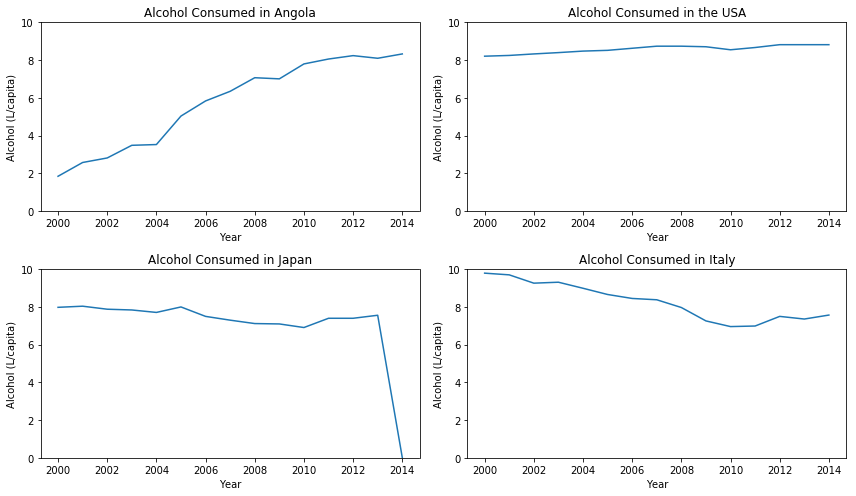

In [8]:
fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2,2,figsize=(12,7))

sns.lineplot(x = 'Year', y = 'Alcohol', data = df[df['Country']=='Angola'], ax = axis1)
sns.lineplot(x = 'Year', y = 'Alcohol', data = df[df['Country']=='United States of America'], ax = axis2)
sns.lineplot(x = 'Year', y = 'Alcohol', data = df[df['Country']=='Japan'], ax = axis3)
sns.lineplot(x = 'Year', y = 'Alcohol', data = df[df['Country']=='Italy'], ax = axis4)

axis1.set_title('Alcohol Consumed in Angola')
axis2.set_title('Alcohol Consumed in the USA')
axis3.set_title('Alcohol Consumed in Japan')
axis4.set_title('Alcohol Consumed in Italy')

for ax in [axis1, axis2, axis3, axis4]:
    ax.set_ylabel('Alcohol (L/capita)')
    ax.set_xlabel('Year')
    ax.set_ylim([0, 10])
plt.tight_layout()

It is a bit suspicious that there is a sudden drop in alcohol consumption from 2013-2014 for Japan.  There are 373 instances where the alcohol consumption is 0.01, which is quite a bit higher than expected.  Below I've plotted a country (Estonia) that has multiple instances of 0.01 L of alcohol consumption.  I suspect these data points are erroneous, whether it is because of unknown information or clerical error.  

In [9]:
df[df['Alcohol']==0.01].shape

(288, 22)

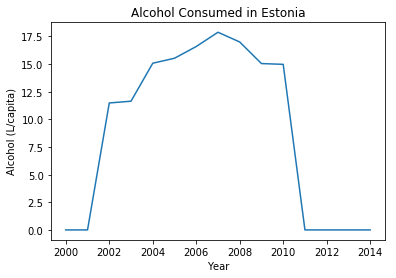

In [10]:
sns.lineplot(x = 'Year', y = 'Alcohol', data = df[df['Country']=='Estonia'])
plt.title('Alcohol Consumed in Estonia')
plt.xlabel('Year')
plt.ylabel('Alcohol (L/capita)')

The countries with the most instances (5 or more) of 0.01 L alcohol consumed are mainly countries that practice Islam.  This is makes sense as they frown upon alcohol consumption, so all of their values are either at or close to 0.01 L.  Thus, I will go through each country that has less than 5 instances of 0.01 L and replace it with np.nan.

In [11]:
df[df['Alcohol']==0.01]['Country'].value_counts()[:15]

Libya                         15
Somalia                       15
Bangladesh                    15
Afghanistan                   11
Mauritania                    11
Iran (Islamic Republic of)     9
Kuwait                         9
Montenegro                     8
Estonia                        6
Pakistan                       5
Mongolia                       4
Fiji                           4
Central African Republic       3
Benin                          3
Rwanda                         3
Name: Country, dtype: int64

In [12]:
drinking_countries = df[df['Alcohol']>1]['Country'].value_counts().index

In [13]:
estonia = df[df['Country']=='Estonia'].copy()

In [14]:
for country in drinking_countries:
    condition = (df['Country']==country)
    df.loc[condition, 'Alcohol'] = df.loc[condition, 'Alcohol'].replace(0.01, np.nan)

I will now use the interpolate function to fill in the missing values for all countries.  Since there are missing values both at the beginning and end of the year range, I will set 'limit_direction' to 'both'.  After interpolation, unique values decreases to ~0.9%, down from ~6.6%.  

In [15]:
for country in df['Country'].unique():
    condition = (df['Country']==country)
    df.loc[condition, 'Alcohol'] = df.loc[condition, 'Alcohol'].interpolate(limit_direction = 'both')

In [16]:
print(tabulate([[i, df[i].isnull().sum()/df.shape[0] * 100, df[i].nunique()] for i in ['Alcohol']], headers=['Column', 'Percent Missing', 'Unique Values'], tablefmt='orgtbl'))

| Column   |   Percent Missing |   Unique Values |
|----------+-------------------+-----------------|
| Alcohol  |          0.578625 |            1076 |


Just to show what the replacement of 0.01 and interpolation did, I've plotted the alcohol consumption in Estonia before (left) and after (right) the data manipulation below.  You can see that although the tail ends of the plot after interpolation is unrealistically flat, the values are closer to the true values than the original graph.  

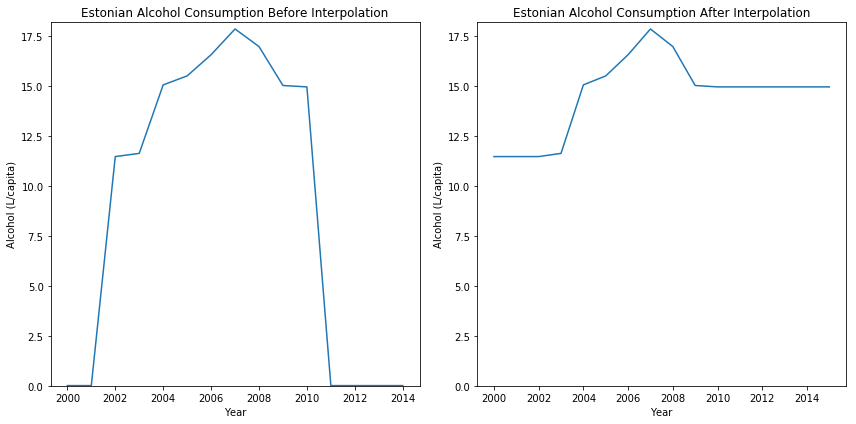

In [19]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(12,6))

sns.lineplot(x = 'Year', y = 'Alcohol', data = estonia, ax = axis1)
sns.lineplot(x = 'Year', y = 'Alcohol', data = df[df['Country']=='Estonia'], ax = axis2)

axis1.set_title('Estonian Alcohol Consumption Before Interpolation')
axis2.set_title('Estonian Alcohol Consumption After Interpolation')

for ax in [axis1, axis2]:
    ax.set_xlabel('Year')
    ax.set_ylabel('Alcohol (L/capita)')
    ax.set_ylim([0, 18.2])
plt.tight_layout()

#### 2.2 - Filling in Missing Values
For the rest of the features, interpolating to fill in the missing values is sufficient.  

In [20]:
missing_col = ['Adult Mortality', 'Life expectancy ', 'Hepatitis B', ' BMI ', 'Polio', 'Diphtheria ', 'Total expenditure', 'GDP',
              'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [21]:
for col in missing_col:
    for country in df['Country'].unique():
        condition = (df['Country']==country)
        df.loc[condition, col] = df.loc[condition, col].interpolate(limit_direction = 'both')

In [22]:
print(tabulate([[i, df[i].isnull().sum()/df.shape[0] * 100, df[i].nunique()] for i in df.columns], headers=['Column', 'Percent Missing', 'Unique Values'], tablefmt='orgtbl'))

| Column                          |   Percent Missing |   Unique Values |
|---------------------------------+-------------------+-----------------|
| Country                         |          0        |             193 |
| Year                            |          0        |              16 |
| Status                          |          0        |               2 |
| Life expectancy                 |          0.340368 |             362 |
| Adult Mortality                 |          0.340368 |             425 |
| infant deaths                   |          0        |             209 |
| Alcohol                         |          0.578625 |            1076 |
| percentage expenditure          |          0        |            2328 |
| Hepatitis B                     |          4.90129  |              87 |
| Measles                         |          0        |             958 |
| BMI                             |          1.15725  |             608 |
| under-five deaths               |   

### 3 - Outliers
After filing in missing values, it is time to deal with outliers.  For these features, one way to deal with outliers is to winsorize each feature by country, as using monotonic transformations such as square roots or logs didn't normalize the data or remove outliers.  

In [23]:
outlier_features = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', 
 ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
 ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

In [24]:
for country in df['Country'].unique():
    for col in outlier_features:
        condition = (df['Country']==country)
        df.loc[condition, col] = winsorize(df[df['Country']==country][col], [0.05, 0.05])

### 4 -  Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect the life expectancy.

#### 4.2 - Life Expectancy
First thing to look at is the distribution for life expectancy.  There is a slight left skew with the peak at around 75 and a range from ~35 to 90.  

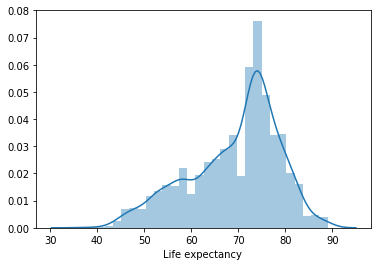

In [25]:
sns.distplot(df[df['Life expectancy '].notnull()]['Life expectancy '])

#### 4.2 - Correlations to Life Expectancy
The quickest way to see what features affect life expectancy is to look at correlations with other features.  Below is a heatmap of the absolute values of the correlations.  The features with the highest correlations are red. In this figure, we see that there are 3 features that strongly correlate with life expectancy.  **These are adult mortality (corr = -0.70), income composition (corr = 0.72), and schooling (corr = 0.75).  It should be noted that adult mortality has a negative correlation whereas income composition and schooling have positive correlations. **

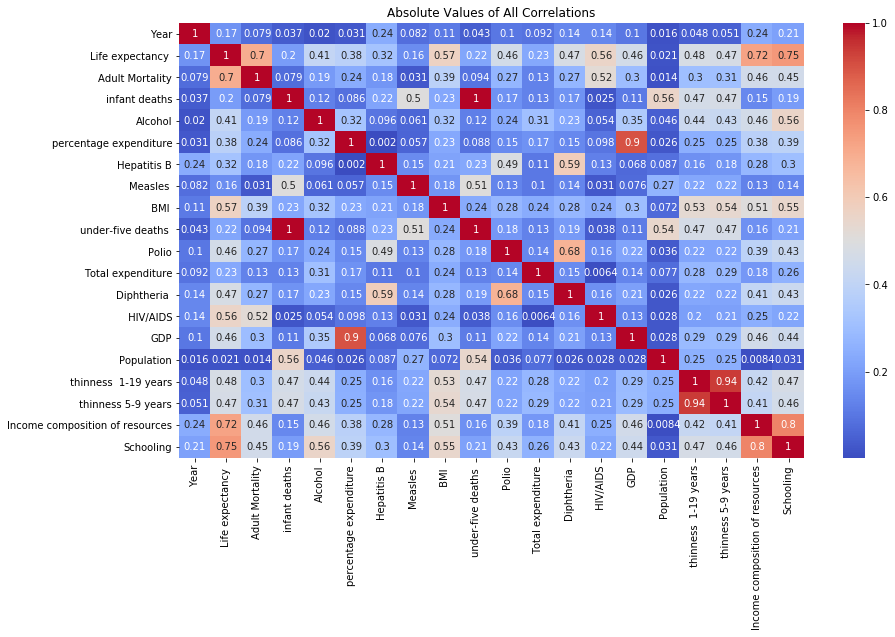

In [45]:
plt.figure(figsize=(14,8))
sns.heatmap(np.absolute(df.corr()), annot = True, cmap="coolwarm")
plt.title('Absolute Values of All Correlations')

In [27]:
df.corr()['Life expectancy ']

Year                               0.170033
Life expectancy                    1.000000
Adult Mortality                   -0.696359
infant deaths                     -0.196557
Alcohol                            0.407481
percentage expenditure             0.381864
Hepatitis B                        0.318132
Measles                           -0.157586
 BMI                               0.567694
under-five deaths                 -0.222529
Polio                              0.460142
Total expenditure                  0.230999
Diphtheria                         0.474818
 HIV/AIDS                         -0.556556
GDP                                0.461511
Population                        -0.021371
 thinness  1-19 years             -0.477183
 thinness 5-9 years               -0.471584
Income composition of resources    0.724776
Schooling                          0.751975
Name: Life expectancy , dtype: float64

Other features that are moderately correlated (corr ~ 0.5) with life expectancy are:

**Positively correlated:**
    - polio
    - GDP
    - diphtheria
    - BMI
**Negatively correlated:**
    - thinness
    - HIV/AIDS, 

Lets plot the strongly correlated features to life expectancy.  As expected, there is a negative trend for adult mortality, but a positive trend for schooling and income composition.  The other thing to note is that those in developed countries consistently have a higher life expectancy than those in developing countries.  

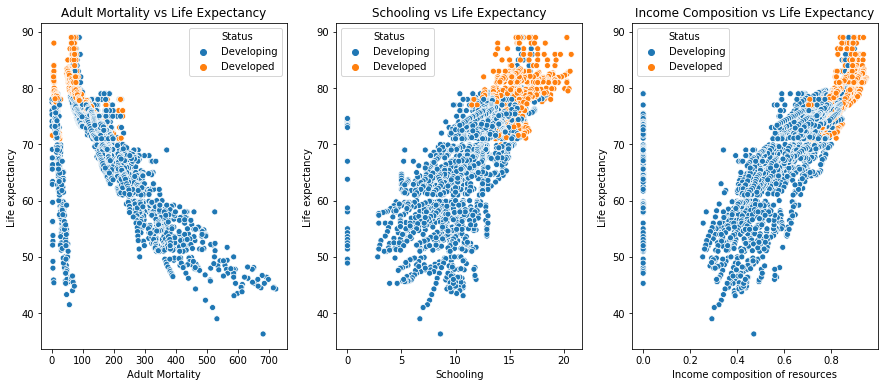

In [28]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3,figsize=(15,6))

sns.scatterplot(x = 'Adult Mortality', y = 'Life expectancy ', hue = 'Status', data = df, ax = axis1)
sns.scatterplot(x = 'Schooling',  y = 'Life expectancy ', hue = 'Status', data = df, ax = axis2)
sns.scatterplot(x = 'Income composition of resources',  y = 'Life expectancy ', hue = 'Status', data = df, ax = axis3)

axis1.set_title('Adult Mortality vs Life Expectancy')
axis2.set_title('Schooling vs Life Expectancy')
axis3.set_title('Income Composition vs Life Expectancy')

What about features that are moderately positively correlated to life expectancy? For GDP, it seems that after ~15k, life expectancy plateaus at ~80.  For BMI, polio and diphtheria, there are values under 10 that seem to be anomalous.  Further investigation should be done to see if missing values or the outlier processing should be re-evaluated. Otherwise, the positive trend with life expectancy can be seen.

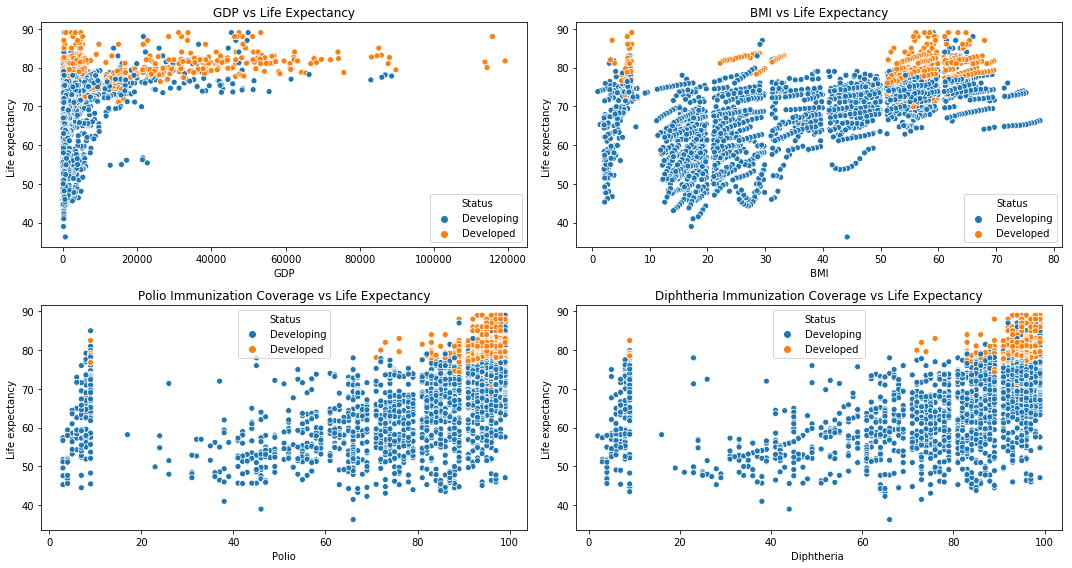

In [29]:
fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2,2,figsize=(15,8))

sns.scatterplot(x = 'GDP', y = 'Life expectancy ', hue = 'Status', data = df, ax = axis1)
sns.scatterplot(x = ' BMI ',  y = 'Life expectancy ', hue = 'Status', data = df, ax = axis2)
sns.scatterplot(x = 'Polio',  y = 'Life expectancy ', hue = 'Status', data = df, ax = axis3)
sns.scatterplot(x = 'Diphtheria ',  y = 'Life expectancy ', hue = 'Status', data = df, ax = axis4)

axis1.set_title('GDP vs Life Expectancy')
axis2.set_title('BMI vs Life Expectancy')
axis3.set_title('Polio Immunization Coverage vs Life Expectancy')
axis4.set_title('Diphtheria Immunization Coverage vs Life Expectancy')

plt.tight_layout()

For the moderately negatively correlated features, I only plotted thinness from ages 10-19 because the two thinness features are highly correlated with each other.  In this case, it is quite difficult to see the negative trend.  The plot for HIV/AIDS however clearly shows the negative trend with life expectancy.  

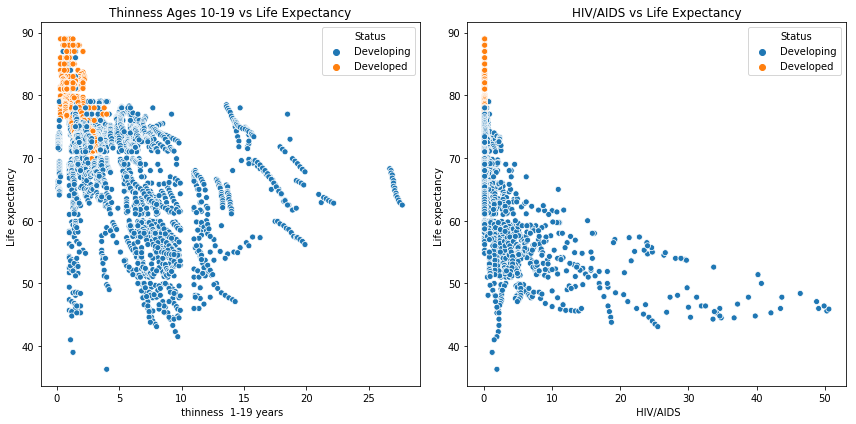

In [30]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(12,6))

sns.scatterplot(x = ' thinness  1-19 years', y = 'Life expectancy ', hue = 'Status', data = df, ax = axis1)
sns.scatterplot(x = ' HIV/AIDS',  y = 'Life expectancy ', hue = 'Status', data = df, ax = axis2)


axis1.set_title('Thinness Ages 10-19 vs Life Expectancy')
axis2.set_title('HIV/AIDS vs Life Expectancy')


plt.tight_layout()

### 5 - In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

Below I've plotted a smaller heatmap to show which features are strongly correlated with each other and can be removed.  To identify highly correlated features quickly, I've plotted the absolute values of the correlation.  I've identified features that are highly correlated ( corr > 0.9) and moderately correlated (0.9 > corr > 0.5), summarized below.

**Highly correlated (corr > 0.9)**
-  Infant deaths and under five deaths
-  GDP and percent expenditure
-  thinness ages 5-9 and thinness ages 10-19

**Moderately correlated (corr > 0.5)**
-  Polio and Diptheria
-  Income composition and schooling

Its interesting that income composition and schooling are moderaltely correlated, as these are two of the features that were found to be correlated with life expectancy.  

In [42]:
correlations = ['Life expectancy ', 'under-five deaths ', 'infant deaths', 'percentage expenditure', 'GDP', 'Diphtheria ', 'Polio', 
                ' thinness 5-9 years', ' thinness  1-19 years','Income composition of resources', 'Schooling']

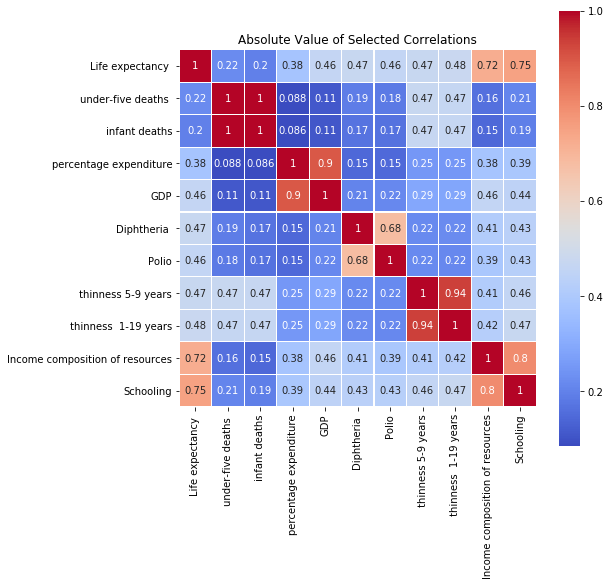

In [46]:
plt.figure(figsize=(8,8))
sns.heatmap(np.absolute(df[correlations].corr()), cmap='coolwarm', annot = True, square = True, linewidths=0.1)
plt.title('Absolute Value of Selected Correlations')

In terms of which features to remove, I'd remove under five deaths, percent expenditure, thinness ages 5-9 years, and polio.

### 6 - Summary
The dataset aggregates several datasets from WHO's data repository and features 193 countries from 2000 to 2015.  Features range over a variety of topics including the country's immunization coverage, finances, schooling, deaths, and illnesses.  The goal was to find out which of these features can be used to estimate life expectancy.  

From a correlation matrix, we found that there are three features that are strong predictors of life expectancy: adult mortality, schooling, and income composition.  From the plots below, it is clear that adult mortality has an inverse relationship with life expectancy whereas schooling and income composition have positive relationships.

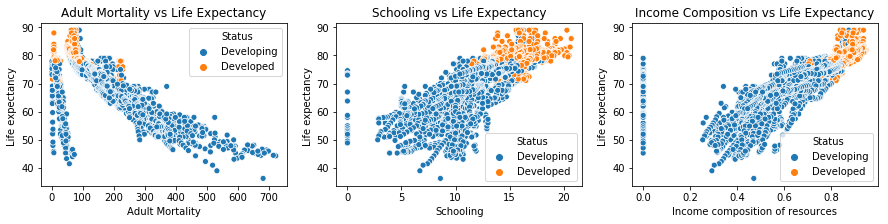

In [48]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3,figsize=(15,3))

sns.scatterplot(x = 'Adult Mortality', y = 'Life expectancy ', hue = 'Status', data = df, ax = axis1)
sns.scatterplot(x = 'Schooling',  y = 'Life expectancy ', hue = 'Status', data = df, ax = axis2)
sns.scatterplot(x = 'Income composition of resources',  y = 'Life expectancy ', hue = 'Status', data = df, ax = axis3)

axis1.set_title('Adult Mortality vs Life Expectancy')
axis2.set_title('Schooling vs Life Expectancy')
axis3.set_title('Income Composition vs Life Expectancy')

There are also 5 features that are moderately related to life expectancy, plotted below.  On the top row are features that are moderately positively correlated to life expectancy.  These are GDP, BMI, and Diphtheria immunization coverage.  On the bottom row are those that are moderately negatively correlated to life expectancy.  These are thinness and HIV/AIDS.

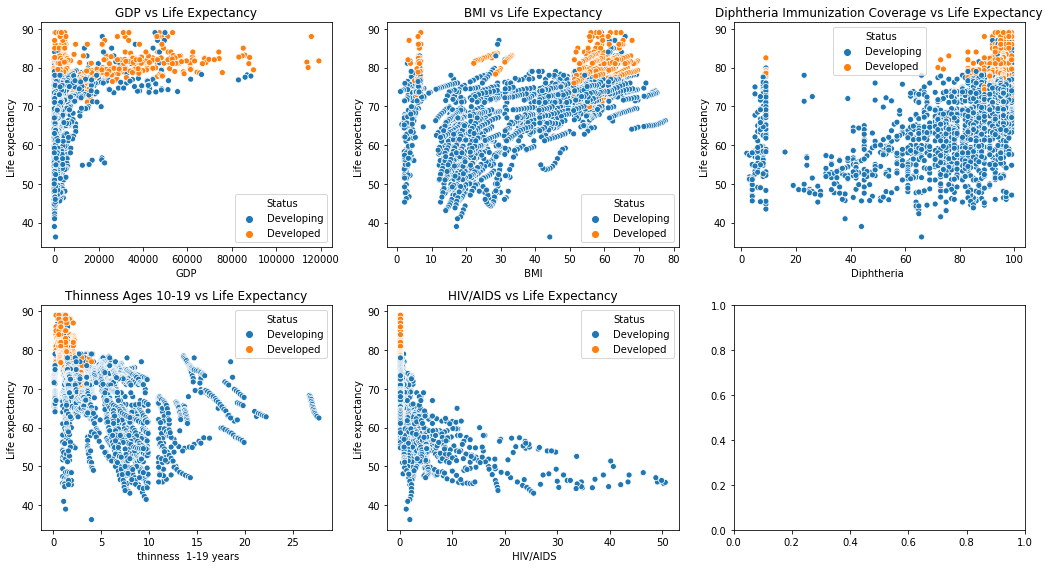

In [55]:
fig, ((axis1, axis2, axis3), (axis4, axis5, axis6)) = plt.subplots(2,3,figsize=(15,8))

sns.scatterplot(x = 'GDP', y = 'Life expectancy ', hue = 'Status', data = df, ax = axis1)
sns.scatterplot(x = ' BMI ',  y = 'Life expectancy ', hue = 'Status', data = df, ax = axis2)
sns.scatterplot(x = 'Diphtheria ',  y = 'Life expectancy ', hue = 'Status', data = df, ax = axis3)
sns.scatterplot(x = ' thinness  1-19 years',  y = 'Life expectancy ', hue = 'Status', data = df, ax = axis4)
sns.scatterplot(x = ' HIV/AIDS',  y = 'Life expectancy ', hue = 'Status', data = df, ax = axis5)

axis1.set_title('GDP vs Life Expectancy')
axis2.set_title('BMI vs Life Expectancy')
axis3.set_title('Diphtheria Immunization Coverage vs Life Expectancy')
axis4.set_title('Thinness Ages 10-19 vs Life Expectancy')
axis5.set_title('HIV/AIDS vs Life Expectancy')

plt.tight_layout()